Author: Kim Hu

Date: Feb 2, 2022

Data source: https://www.kaggle.com/blastchar/telco-customer-churn

# Introduction

Telco is a telecommunication company, which provides phone and internet services. Like other telecommunication companies in the retail business, Telco generates revenue mainly by monthly subscriptions. It provides three types of contracts to its customers: month-to-month, one-year, and two-year contracts. Additionally, Telco provides add-on services with charges, such as “multiple lines” for phone users and “online security,” “online backup,” “device protection,” “tech support,” “streaming TV,” and “streaming movies” for internet users. 

The ability to acquire new customers is important to the business, but keeping the existing customers is also essential. Usually, acquiring a new customer is very hard as the conversion rate is less than 1%. Therefore, we must do our best not to lose our existing customers. If we lose an existing customer, we lose the acquisition cost, and the future cash flows from the customer. So, we incorporate churn rate to measure how many customers leave us out of the total existing customers. In the subscription business model, we can easily predict the future cash streams if we can accurately predict the customer churn rates. Therefore, we can also increase future cash flows by reducing the churn rate.

In this project, I will explore the Telco retail customer data and use machine learning to find out the key factors affecting the churn rate. By doing so, Telco will improve its business and generate more revenue in the future by lowering the churn rate.

# Methodology

I will apply the Logistic Regression (LR) machine learning model because the data has the target label with two classes, churn and stay. In the LR model, I will maximize the recall score because I want to determine the customers who will churn as many as possible. Another reason is that since the project aims to find out the key factors affecting the churn rate, using LR will generate results in probabilities, easier to interpret and turn the data into business insights. 

# Exploratory Data Analysis (EDA)
The data has 7043 rows and 21 columns, including the label column. Out of the 7043 observations, 1869 churn, giving the overall churn rate 26.5%. Besides the ID column, customerID, we have 17 categorical variables and three numeric variables in the data set. I drop the customerID column because it has no value in the model. According to the statistical tests, I drop gender and PhoneService columns because they have no effect in predicting a customer would churn or not. I also drop TotalCharges columns because it is strongly related to the tenure variable, and it is calculated by tenure times monthly charges, which two variables will be in the model. 

For the categorical variables, there are no missing values in each variable. And for the numeric variables, there are no outliers. The histogram charts show that customers stay from 0 to 72 months, paying from 18.25 to 89.85 dollars monthly.

In summary, the final selected independent variables and their relationships with churn based on their charts against the dependent variable, as shown by the following table.

| Variable Type | Variable Name	| Reason Causing Higher Churn |
| :---: | --- | --- |
| Categorical |	SeniorCitizen |	Senior |
| Categorical |	Partner	No | partner |
| Categorical |	Dependents | No dependent |
| Categorical |	MultipleLines | Multiple lines |
| Categorical |	InternetService | Fiber optic |
| Categorical |	OnlineSecurity | No online security |
| Categorical |	OnlineBackup |	No online backup |
| Categorical |	DeviceProtection | No device protection |
| Categorical |	TechSupport | No tech support |
| Categorical |	StreamingTV | No streaming TV |
| Categorical |	StreamingMovies | No streaming movies |
| Categorical |	Contract |	Month-to-month contract |
| Categorical |	PaperlessBilling |	Paperless billing |
| Categorical |	PaymentMethod |	Electronic check |
| Numeric |	tenure | Shorter |
| Numeric |	MonthlyCharges | Higher |

There are two interesting and counter-intuitive findings from the exploratory data analysis. First, customers with multiple lines are more likely to churn. When customers have more than one line should be more inconvenient to switch product service. The second finding is that customers who choose paperless billing are more likely to churn. However, intuitively, paperless bills reduce the inconvenience of getting rid of the paper. Therefore, customers should enjoy the hassle-free method so that they are less likely to churn.

Model Result
After tuning the hyperparameter C, the best model (C=10) improves the recall score from 0.29 from the baseline to 0.54 and has an overall accuracy score of 0.82. In the test data with 1409 observations, out of the 366 customers who churn, the model successfully predicts 210. 
The two most reasons customers churn are the Fiber optic internet service and the Month-to-month contract. Each reason would cause about 100% more likely for customers to churn. Tenure, on the opposite, will be the most reason for customers not to churn. The longer the customers stay, the less likely the customers would churn. Very intuitively, since customers who sign Month-to-month contracts are more likely to churn, those who sign one-year or two-year contracts are more likely to stay. However, surprisingly, the customers seem more likely to stay at higher monthly charges. After calculating the average monthly charges for month-to-month, one-year, and two-year contracts in Fiber optic, DSL, and phone services, we can see that the month-to-month contract is the cheapest and the two-year contract is the most expensive three service categories.

# Recommendations

Based on the model results, Telco company should find out why Fiber optic customers churn and improve the Fiber optic service. Telco also should find ways to stimulate the customers on month-to-month contracts to sign a two-year contract. The company could have 50% fewer customers to churn. 

However, before Telco looks for ways to stimulate customers to sign a two-year contract, the company should improve its pricing strategy, assuming the price has not changed for the past two years. As we can see, the monthly charge for a two-year contract is more expensive than the charge for month-to-month. Furthermore, out of 875 customers who choose Fiber optic service but churn, more than 43% of them have streaming movies or TV add-on services. With the add-on services, such as streaming TV and movies, and a lower price, customers seem to have no reason to sign a two-year contract with Telco.

Lastly, the senior customers who choose Fiber optic internet service are more likely to churn than the non-senior customers. Since senior customers are usually less tech-savvy than non-seniors, targeting the right customer group can reduce the churn rate and improve cost-efficiency.

# Improvement and Extension

The LR model is underfitting after it’s deployed on the test data because the recall score on the test data is higher than that on the train data. In the future, I should conduct cross-validation to compare the scores between train and validation and increase the complexity of the model if the underfitting happens again.

The LR model in Python does not provide the p-value and standard error for each feature. And since I use MinMaxScaler on the numeric features, it is harder to interpret them. Therefore, it is possible to conduct the LR in R with a better model interpretation by giving up hyperparameter tuning.

The data contains three types of customers, phone users, internet users, and both. Running an LR model on all types of customers will bury some features that are less significant to the churn reasons but could dominate in certain customer gruops. For example, will changing bill payment methods from electronic checks to credit cards help to reduce churn rates for senior customers? Will offering online security help to reduce the churn rate for Fiber optic customers? Or, is multiple lines customers more likely to churn than single-line customers? All these questions can not be answered in the scope of the project. And I can segment the data by categories and run the LR model, respectively. 

Finally, we should collborate with the pricing team to learn more about the current prices on the add-on services and different types of contracts. More details on the price and its time period can help us form a better pricing strategy to attract more customers to sign a two-year contract, in order to reduce the churn rate.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.stats import pearsonr  
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import plot_confusion_matrix, classification_report
import scipy
import math

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# dropping the customerID column
df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# can't convert the TotalCharges column from string to float, try to find out what happend

for i in range(len(df)):
    try:
        float(df['TotalCharges'][i])
    except:
        print(i)

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [6]:
df['TotalCharges'][488]


' '

In [7]:
# some cells have empty space instead of 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x.replace(' ', '0'))
df['TotalCharges'][488]

'0'

In [8]:
# convert the column to float data type
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x))

In [9]:
# number of customers who only use phone service
df[(df['PhoneService']=='Yes') & (df['InternetService']=='No')].shape[0]

1526

In [10]:
# number of customers who only use internet service
df[(df['PhoneService']=='No') & (df['InternetService']!='No')].shape[0]

682

In [11]:
# number of customers who use both phone and internet service
df[(df['PhoneService']!='No') & (df['InternetService']!='No')].shape[0]

4835

In [12]:
# calculate the churn rate
print('churn counts: %d \nstay counts: %d\nchurn pct: %0.1f' 
% (df[df['Churn']=='Yes'].count()[0],
   df[df['Churn']=='No'].count()[0],
   df[df['Churn']=='Yes'].count()[0]/df.count()[0]*100)  )

churn counts: 1869 
stay counts: 5174
churn pct: 26.5


In [13]:
# 1 if churn, else 0
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
# define a function to explore each column
# x is column name

def categorycol(x):
    col = df[x].unique()
    N = len(df[x].unique())
    ind = np.arange(2)
    width = 0.2
    lst = []
    
    # get counts for each kind in the column 
    for i in range(N):
        print(str(col[i]) + ': %d' % (df[df[x]==col[i]].count()[0]))
    
    # visualize churn vs stay for the column
    for i in range(N):
        yes_count = df[(df[x]==col[i]) & (df['Churn']==1)].count()[0]
        no_count = df[(df[x]==col[i]) & (df['Churn']==0)].count()[0]
        bar = (yes_count, no_count)         

        plt.bar(ind+i*width, bar, width, label=col[i])
        plt.text(0+i*width, yes_count+10, s=f"{yes_count}")
        plt.text(1+i*width, no_count+10, s=f"{no_count}")
    
    plt.title('Churn in '+ x)
    plt.ylabel('Count')
    plt.xticks(ind+width/N, ('Churn', 'Stay'))
    plt.legend(loc='best')
    plt.savefig(x+'.png')
    plt.show()
    
    
    # run chi2 test to see the relationship between the category and churn
    for i in range(N):
        lst.append([df[df[x]==col[i]].count()[0],
                df[(df[x]==col[i]) & (df['Churn']==1)].count()[0]])
    
    _, p, _, _ = chi2_contingency(lst)
    
    if p < 0.05:
        print('In column ' + x + ', there is significant difference in the customer types to churn.')
    else:
        print('In column ' + x +\
              ', there is no difference in the customer types to churn, so we can consider dropping the column.')

In [15]:
plt.rcParams["figure.figsize"]=8,6

Female: 3488
Male: 3555


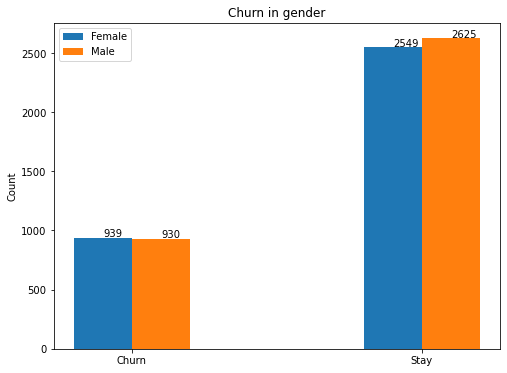

In column gender, there is no difference in the customer types to churn, so we can consider dropping the column.


In [16]:
categorycol('gender')

For the **gender** column, male and female counts are 3555 and 3488, about 50-50, the same as their churn rates. The chi2 test result shows no significant difference in gender to churn. In other words, we can’t tell if a customer is more willing to churn by the customer’s gender while holding other variables constant. So, I **drop** the column in the model.

0: 5901
1: 1142


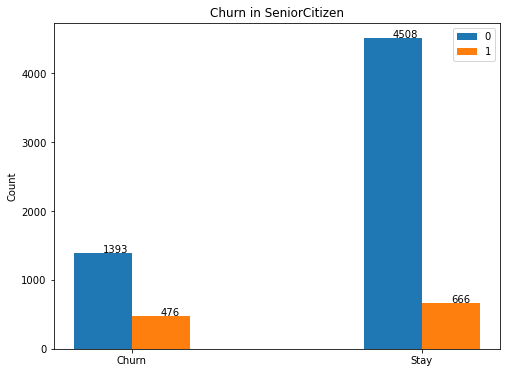

In column SeniorCitizen, there is significant difference in the customer types to churn.


In [17]:
categorycol('SeniorCitizen')

For the **SeniorCitizen** column, 5901 customers are not senior, and 1142 customers are senior. And as we can see, senior customers are more likely to churn while holding other variables constant.

Yes: 3402
No: 3641


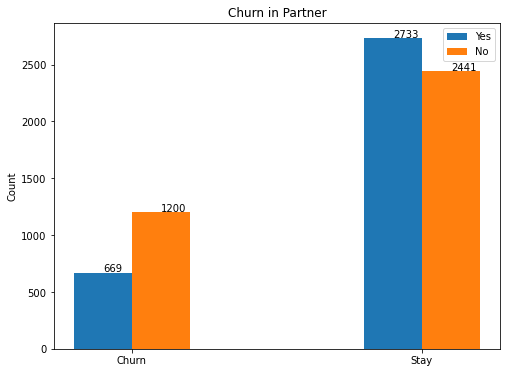

In column Partner, there is significant difference in the customer types to churn.


In [18]:
categorycol('Partner')

For the **Partner** column, 3402 customers have a partner, and 3641 don’t. Customers who don’t have a partner are more likely to churn while holding other variables constant.

No: 4933
Yes: 2110


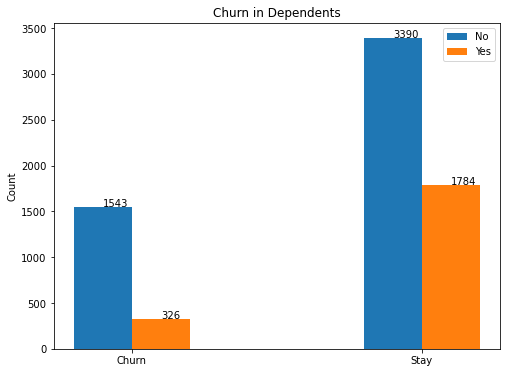

In column Dependents, there is significant difference in the customer types to churn.


In [19]:
categorycol('Dependents')

For the **Dependents** column, 4933 customers have dependents and 2110 don’t. Customers who don’t have dependents are more likely to churn while holding other variables constant. 

No: 682
Yes: 6361


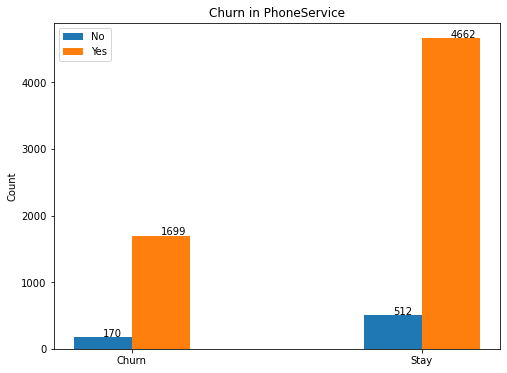

In column PhoneService, there is no difference in the customer types to churn, so we can consider dropping the column.


In [20]:
categorycol('PhoneService')

For the **phoneService** column, 6361 customers have phone service, and 682 don’t. However, we can’t tell which customer types are more likely to churn while holding other variables constant. So, I **drop** the column in the model.

No phone service: 682
No: 3390
Yes: 2971


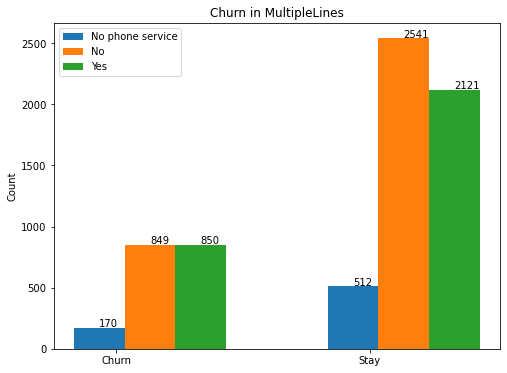

In column MultipleLines, there is significant difference in the customer types to churn.


In [21]:
categorycol('MultipleLines')

For the **MultipleLines** column, out of 6361 customers who have phone service, 2971 customers have multiple lines, and 3390 don’t. About 25% of the customers don’t have multiple lines churn, whereas 28% have multiple lines churn. So, customers with multiple lines are more likely to churn while holding other variables constant.

DSL: 2421
Fiber optic: 3096
No: 1526


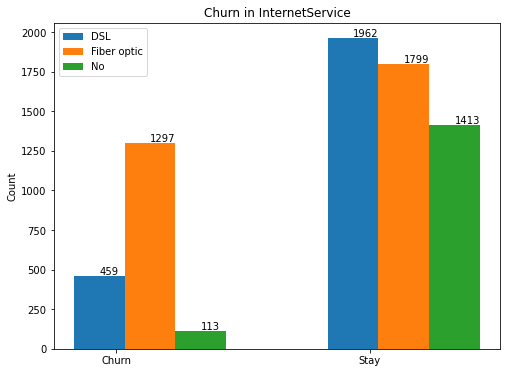

In column InternetService, there is significant difference in the customer types to churn.


In [22]:
categorycol('InternetService')

For the **InternetService** column, 2421 customers have DSL, 3096 have Fiber optic, and 1526 don’t have internet service. The chart shows that customers with Fiber optic are more likely to churn while holding other variables constant.

No: 3498
Yes: 2019
No internet service: 1526


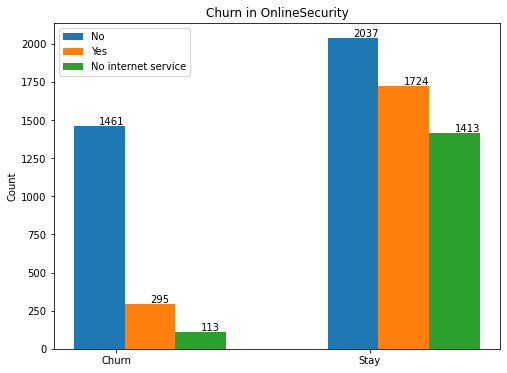

In column OnlineSecurity, there is significant difference in the customer types to churn.


In [23]:
categorycol('OnlineSecurity')

For the **OnlineSecurity** column, out of the 5517 customers who have internet service, 3498 don’t have online security and 2019 have. Those who don’t have online security are more likely to churn while holding other variables constant.

Yes: 2429
No: 3088
No internet service: 1526


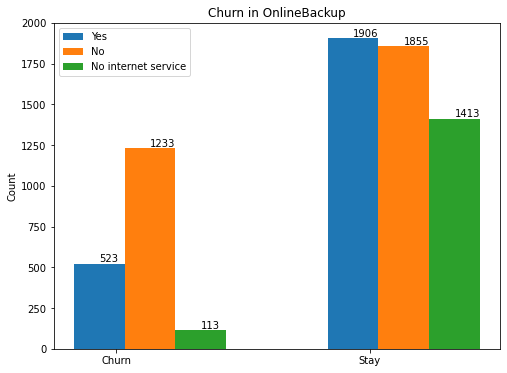

In column OnlineBackup, there is significant difference in the customer types to churn.


In [24]:
categorycol('OnlineBackup')

For the **OnlineBackup** column, out of the 5517 customers who have internet service, 2429 have online backup, and 3088 don’t. Those who don’t have online backup are more likely to churn while holding other variables constant. 

No: 3095
Yes: 2422
No internet service: 1526


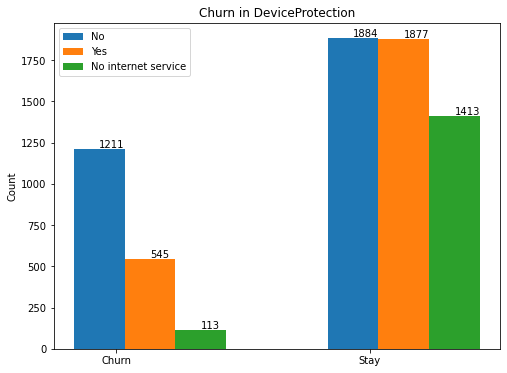

In column DeviceProtection, there is significant difference in the customer types to churn.


In [25]:
categorycol('DeviceProtection')

For the **DeviceProtection** column, out of the 5517 customers who have internet service, 2422 have online backup, and 3095 don’t. Those who don’t have device protection are more likely to churn while holding other variables constant. 

No: 3473
Yes: 2044
No internet service: 1526


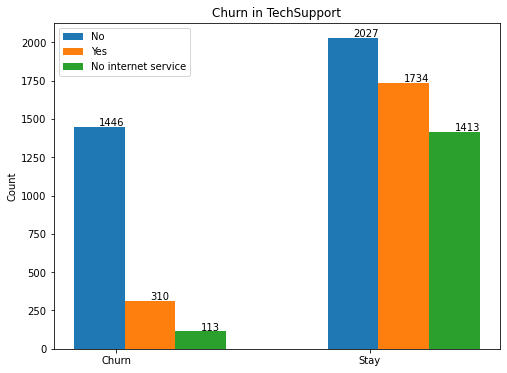

In column TechSupport, there is significant difference in the customer types to churn.


In [26]:
categorycol('TechSupport')

For the **TechSupport** column, out of the 5517 customers who have internet service, 2044 have online backup, and 3473 don’t. Those who don’t have tech support are more likely to churn while holding other variables constant. 

No: 2810
Yes: 2707
No internet service: 1526


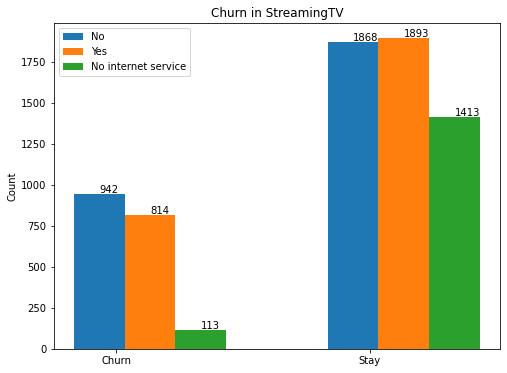

In column StreamingTV, there is significant difference in the customer types to churn.


In [27]:
categorycol('StreamingTV')

For the **StreamingTV** column, out of the 5517 customers who have internet service, 2707 have online backup, and 2810 don’t. Those who don’t have streaming TV are more likely to churn while holding other variables constant. 

No: 2785
Yes: 2732
No internet service: 1526


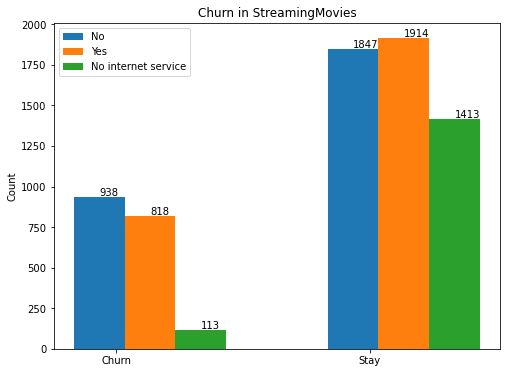

In column StreamingMovies, there is significant difference in the customer types to churn.


In [28]:
categorycol('StreamingMovies')

For the **StreamingMovies** column, out of the 5517 customers who have internet service, 2732 have online backup, and 2785 don’t. Those who don’t have streaming movies are more likely to churn while holding other variables constant. 

Month-to-month: 3875
One year: 1473
Two year: 1695


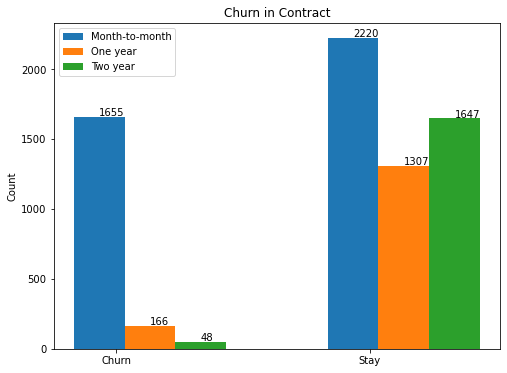

In column Contract, there is significant difference in the customer types to churn.


In [29]:
categorycol('Contract')

For the **contract** column, 3875 customers are on a month-to-month contract, 1473 on a one-year contract, and 1695 on a two-year contract. Customers on month-to-month contracts are more likely to churn while holding other variables constant.

Yes: 4171
No: 2872


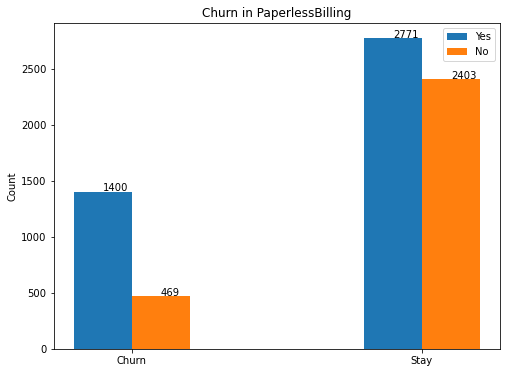

In column PaperlessBilling, there is significant difference in the customer types to churn.


In [30]:
categorycol('PaperlessBilling')

For the **PaperlessBilling** column, 4171 customers have paperless billing, and 2872 don’t. Customers who don’t have paperless billing are more likely to churn while holding other variables constant.

Electronic check: 2365
Mailed check: 1612
Bank transfer (automatic): 1544
Credit card (automatic): 1522


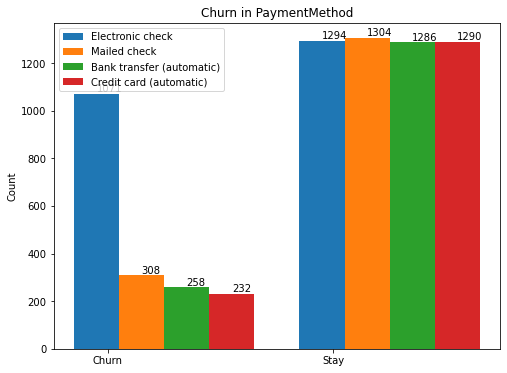

In column PaymentMethod, there is significant difference in the customer types to churn.


In [31]:
categorycol('PaymentMethod')

For the **PaymentMethod** column, 2365 customers have electronic checks, 1612 have mailed checks, 1544 have automatic bank transfers, and 1522 have automated credit card transfers. Customers who have electronic checks as the payment method are more likely to churn while holding other variables constant.

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


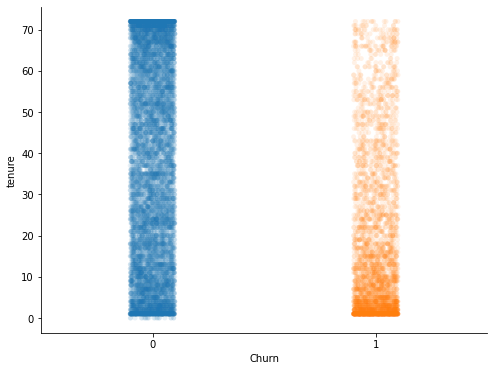

In [33]:
sns.stripplot(x=df['Churn'], y=df['tenure'], jitter=True, alpha=0.1)
sns_plot = sns.stripplot(x=df['Churn'], y=df['tenure'], jitter=True, alpha=0.1)
sns_plot.figure.savefig('tenure.png')
sns.despine()

For the **tenure** column, the tenure average is 32 months, the median is 29 months, and it ranges from 0 to 72 months, where the middle 50% quantile ranges from 9 to 55 months. The shorter the tenure is, the more likely the customer will churn.

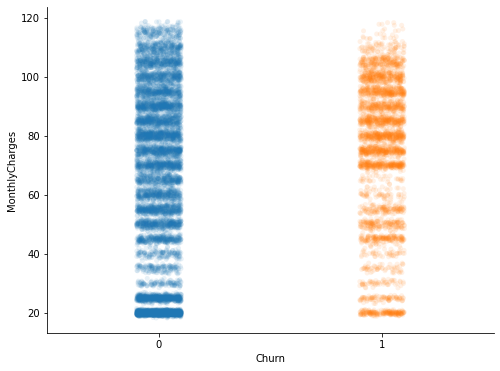

In [34]:
sns.stripplot(x=df['Churn'], y=df['MonthlyCharges'], jitter=True, alpha=0.1)
sns_plot = sns.stripplot(x=df['Churn'], y=df['MonthlyCharges'], jitter=True, alpha=0.1)
sns_plot.figure.savefig('MonthlyCharges.png')
sns.despine()

For the **MonthlyCharges** column, the monthly charge average is $65, the median is $70, and ranges from $18 to $119, whereas the middle 50% quantile ranges from $36 to $90. The more the monthly charge is, the more likely the customer will churn.

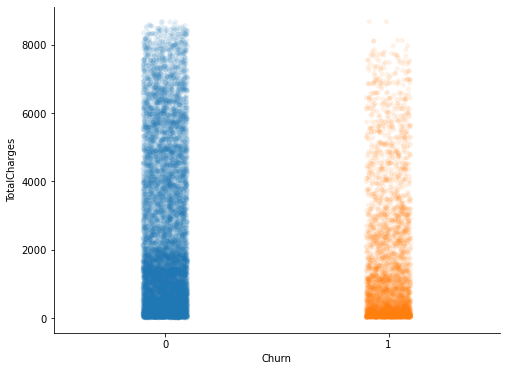

In [35]:
sns.stripplot(x=df['Churn'], y=df['TotalCharges'], jitter=True, alpha=0.1)
sns_plot = sns.stripplot(x=df['Churn'], y=df['TotalCharges'], jitter=True, alpha=0.1)
sns_plot.figure.savefig('TotalCharges.png')
sns.despine()

0.8261783979502422


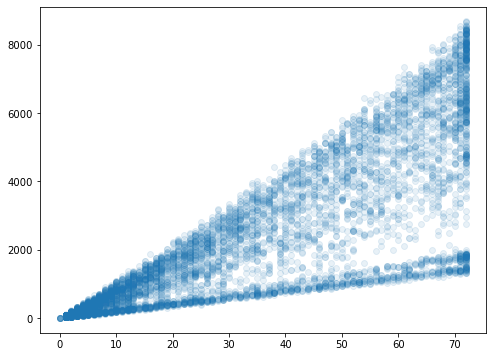

In [36]:
# calculate the correlation between tenure and totalcharges
cor = pearsonr(df['tenure'].tolist(), df['TotalCharges'].tolist())[0]
print(cor)

plt.scatter(x=df['tenure'], y=df['TotalCharges'], alpha=0.1)
plt.savefig('tenure vs totalcharges.png')
plt.show()

For the **TotalCharges** column, the total charge has a strong relationship with the tenure column, with a correlation of 0.83. So, it will be **dropped**.

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
df_final = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn']]
df_final.to_csv('df_final.csv', index=False)

## Fitting the LR model

In [39]:
df1 = pd.read_csv('df_final.csv')

In [40]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [41]:
X = df1.drop(columns=['Churn'])
y = df1[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

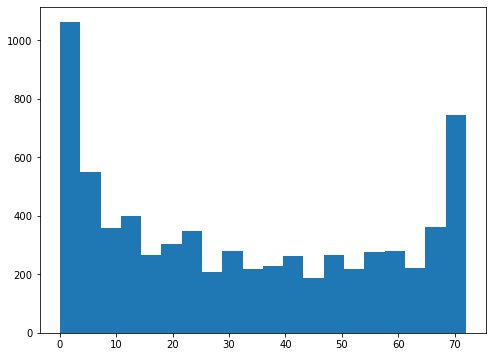

In [42]:
plt.hist(df['tenure'], bins=20)
plt.show()

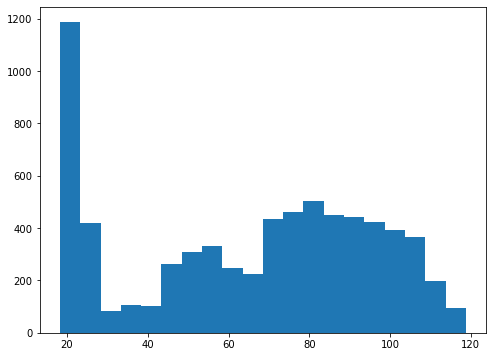

In [43]:
plt.hist(df['MonthlyCharges'], bins=20)
plt.show()

In [44]:
numeric_col = ['tenure', 'MonthlyCharges']
categorical_col = ['SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Use MinMaxScaler instead of StandardScaler 
# because all the numeric features have more observations 
# in the lower bound, shown by the histogram charts. 
# MinMaxScaler will scale the numbers to a range from 0 to 1, 
# easier to interpret the results.
numeric_transformer = make_pipeline(MinMaxScaler())

# Use OneHotEncoder instead of OrdinalEncoder 
# because all the categorical features do not have ordinal orders
categorical_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))

preprocessor = make_column_transformer(
               (numeric_transformer, numeric_col), 
               (categorical_transformer, categorical_col), 
                remainder='passthrough')

pipe = make_pipeline(preprocessor, LogisticRegression(random_state=2022))

In [45]:
# Use stratified as the strategy in the dummy classifier
# because the two classes in the target label are unevenly distributed.
dummy_clf = DummyClassifier(strategy='stratified', random_state=2022)
dummy_pipe = make_pipeline(preprocessor, dummy_clf)
dummy_df = pd.DataFrame(cross_validate(dummy_clf, X_train, y_train, return_train_score=True, scoring='recall'))
dummy_df.mean()

fit_time       0.005889
score_time     0.006779
test_score     0.290073
train_score    0.270957
dtype: float64

In [46]:
param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='recall',\
                           return_train_score=True, n_jobs=-1)


In [47]:
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'Onl

In [48]:
grid_search.best_score_

0.5422958057395144

In [49]:
best_model = grid_search.best_estimator_

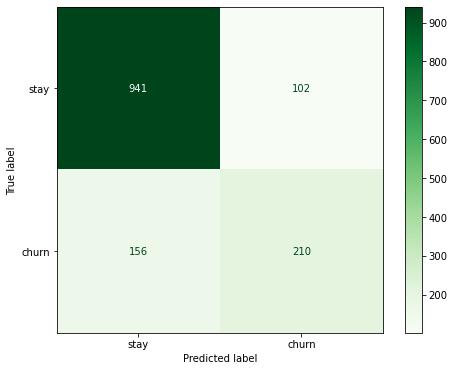

In [50]:
plot_confusion_matrix(best_model, X_test, y_test, display_labels=['stay', 'churn'], 
                     values_format='d', cmap='Greens')

In [51]:
print(classification_report(y_test, best_model.predict(X_test),
                            target_names=['stay', 'churn']))

              precision    recall  f1-score   support

        stay       0.86      0.90      0.88      1043
       churn       0.67      0.57      0.62       366

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [52]:
feat_coef = best_model.named_steps['logisticregression'].coef_

cat_feats = best_model.named_steps['columntransformer'].transformers_[1][1].\
named_steps['onehotencoder'].get_feature_names(categorical_col).tolist()
all_feats = numeric_col + cat_feats

features_df = pd.DataFrame(data = [all_feats, feat_coef.flatten()])
features_df = features_df.T
features_df = features_df.rename(columns={0:'feature', 1:'feature_coefs'})


In [53]:
pos_feats = features_df[features_df['feature_coefs']>0].sort_values(by='feature_coefs', ascending=False)
pos_feats['prob'] = pos_feats['feature_coefs'].apply(lambda x: (math.exp(x)-1)*100)
pos_feats


,feature,feature_coefs,prob
9,InternetService_Fiber optic,0.760125,113.854401
29,Contract_Month-to-month,0.681723,97.728112
28,StreamingMovies_Yes,0.318614,37.522000
25,StreamingTV_Yes,0.317959,37.432021
32,PaperlessBilling_Yes,0.305585,35.741942
11,OnlineSecurity_No,0.227964,25.604012
35,PaymentMethod_Electronic check,0.210619,23.444243
20,TechSupport_No,0.199736,22.107986
7,MultipleLines_Yes,0.189704,20.889138
2,SeniorCitizen_1,0.188659,20.762887


In [54]:
# find out the number of non-senior customers who choose Fiber optic
df1[df1['SeniorCitizen']==0]['InternetService'].value_counts()

Fiber optic    2265
DSL            2162
No             1474
Name: InternetService, dtype: int64

In [55]:
# find out the number of non-senior customers who choose Fiber optic but churn 
df1[(df1['SeniorCitizen']==0) & (df1['Churn']==1)]['InternetService'].value_counts()

Fiber optic    904
DSL            381
No             108
Name: InternetService, dtype: int64

In [56]:
# find out the number of senior customers who choose Fiber optic
df1[df1['SeniorCitizen']==1]['InternetService'].value_counts()

Fiber optic    831
DSL            259
No              52
Name: InternetService, dtype: int64

In [57]:
# find out the number of senior customers who choose Fiber optic but churn
df1[(df1['SeniorCitizen']==1) & (df1['Churn']==1)]['InternetService'].value_counts()

Fiber optic    393
DSL             78
No               5
Name: InternetService, dtype: int64

In [58]:
# testing if senior customers who choose Fiber optic are more likely to churn than non-senoir customers
# null hypothesis: The two customer groups, senior and non-senior, who choose Fiber optic have no different in churn rate
_,p,_,_ = chi2_contingency([
    [2265, 904],
    [831, 393]
])
p
# p-value less than 0.05, indicating that for the customers who purchase Fiber optic
# senior customers are more likely to churn

0.021665977467992363

In [59]:
df1[((df1['StreamingMovies']=='Yes') | (df1['StreamingTV']=='Yes')) & (df1['Churn']==1)]['InternetService'].value_counts()

Fiber optic    875
DSL            186
Name: InternetService, dtype: int64

In [60]:
df1[['InternetService', 'Contract', 'StreamingMovies']]\
[(df1['StreamingMovies']=='Yes') & (df1['Churn']==1) & (df1['InternetService']=='Fiber optic')]\
.groupby(['InternetService', 'Contract']).count()\
/df1[(df1['InternetService']=='Fiber optic') & (df1['Churn']==1)].shape[0]

StreamingMovies
InternetService Contract                       
Fiber optic     Month-to-month         0.431766
                One year               0.072475
                Two year               0.020817

In [61]:
df1[['InternetService', 'Contract', 'StreamingTV']]\
[(df1['StreamingTV']=='Yes') & (df1['Churn']==1) & (df1['InternetService']=='Fiber optic')]\
.groupby(['InternetService', 'Contract']).count()\
/df1[(df1['InternetService']=='Fiber optic') & (df1['Churn']==1)].shape[0]

StreamingTV
InternetService Contract                   
Fiber optic     Month-to-month     0.437934
                One year           0.070162
                Two year           0.021588

In [62]:
df1[(df1['InternetService']=='Fiber optic') & (df1['Churn']==1)].shape

(1297, 17)

In [63]:
df1[['Contract', 'PaperlessBilling']]\
[(df1['PaperlessBilling']=='Yes') & (df1['Churn']==1) & (df1['InternetService']=='Fiber optic')]\
.groupby(['Contract']).count()

,PaperlessBilling
Contract,
Month-to-month,962
One year,80
Two year,26


In [64]:
df1[['InternetService', 'Contract', 'PaperlessBilling']]\
[(df1['PaperlessBilling']=='No') & (df1['Churn']==1)]\
.groupby(['InternetService', 'Contract']).count()

PaperlessBilling
InternetService Contract                        
DSL             Month-to-month               145
                One year                      17
                Two year                       7
Fiber optic     Month-to-month               200
                One year                      24
                Two year                       5
No              Month-to-month                61
                One year                       7
                Two year                       3

In [65]:
neg_feats = features_df[features_df['feature_coefs']<0].sort_values(by='feature_coefs', ascending=True)
neg_feats['prob'] = neg_feats['feature_coefs'].apply(lambda x: (1-math.exp(x))*100)
neg_feats

,feature,feature_coefs,prob
0,tenure,-2.464879,91.498089
1,MonthlyCharges,-1.898915,85.026902
31,Contract_Two year,-0.725257,51.580008
8,InternetService_DSL,-0.589815,44.557008
27,StreamingMovies_No internet service,-0.230781,20.608682
24,StreamingTV_No internet service,-0.230781,20.608682
21,TechSupport_No internet service,-0.230781,20.608682
15,OnlineBackup_No internet service,-0.230781,20.608682
18,DeviceProtection_No internet service,-0.230781,20.608682
12,OnlineSecurity_No internet service,-0.230781,20.608682


In [66]:
df1[['InternetService', 'Contract', 'MonthlyCharges']].groupby(['InternetService', 'Contract']).mean()

MonthlyCharges
InternetService Contract                      
DSL             Month-to-month       50.219501
                One year             61.396754
                Two year             70.462978
Fiber optic     Month-to-month       87.021194
                One year             98.779499
                Two year            104.571445
No              Month-to-month       20.409542
                One year             20.819505
                Two year             21.777351